In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import Bio.SeqUtils.MeltingTemp as mt

from dredFISH.Utils.__init__plots import *

In [2]:
def recalc_tm(seq, fmd=0, Na=1e-5, dnac1=0, dnac2=0):
    """
    """
    res = mt.Tm_NN(seq, Na=Na, dnac1=dnac1, dnac2=dnac2)
    res = mt.chem_correction(res, fmd=fmd)
    return res
    
def get_gc(seq):
    """
    """
    return (seq.count('G') + seq.count('C'))/len(seq)

In [3]:
def diagnostic_panels(dfnew):
    """
    """
    fig, axs = plt.subplots(2, 3, figsize=(3*5,2*4))
    ax = axs[0,0]
    sns.scatterplot(data=dfnew, x='onscore', y='offscore', edgecolor='none', s=5, ax=ax,) 
    ax = axs[0,1]
    sns.histplot(dfnew['onscore'],  ax=ax, bins=100)
    ax.set_yscale('log')
    ax = axs[0,2]
    sns.histplot(np.log10(dfnew['offscore']+1), ax=ax, bins=100)
    ax.set_yscale('log')
    ax.set_xlabel('log10(offscore+1)')
    ax = axs[1,0]
    sns.histplot(dfnew['prob'], bins=100, ax=ax)
    ax = axs[1,1]
    sns.histplot(dfnew['maxkmer'], bins=20, ax=ax)
    ax.set_yscale('log')
    ax = axs[1,2]
    sns.scatterplot(data=dfnew, x='tm', y='gc', edgecolor='none', s=5, ax=ax) 
    # ax.set_xticks([37, 40, 45, 50, 52])
    fig.tight_layout()

In [4]:
ddir = "/bigstore/GeneralStorage/fangming/projects/dredfish/packages/PaintSHOP_pipeline/test14_denovo/" 
f = os.path.join(ddir, "pipeline_output/03_output_files_v3tm37-47tp37/03_rna_probes_iso/mm10_iso_newBalance.tsv")
header=[
    'chrom', 'start', 'end', # one based?
    'seq', 
    'tm', 
    'onscore',  # 0-100
    'offscore', # 0-10,000
    'repeat',
    'prob',
    'maxkmer',
    'strand',
    'gname',
    'transcripts',
]

df = pd.read_csv(f, sep="\t", header=None)
df.columns = header
df['len'] = df['end']-df['start']+1
df['gc'] = df['seq'].apply(get_gc) 
df

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
0,chr1,3214511,3214540,AAAAGCACCATGACCAAGGACACCGAAAAC,40.12,100.000,0.000,0,0.456,25,+,Xkr4,1,30,0.466667
1,chr1,3214541,3214570,AGAAAGCGGGAATGTTTACTTGCTGTGTGG,39.76,100.000,0.000,0,0.310,0,+,Xkr4,1,30,0.466667
2,chr1,3214625,3214654,ACAAATCTTAGCTGATGGAGTGGTAAGCCC,38.59,100.000,0.000,0,0.276,0,+,Xkr4,1,30,0.466667
3,chr1,3214679,3214708,AATGGCATACACATTGCATCTGTATGCTCT,37.39,100.000,0.000,0,0.177,3,+,Xkr4,1,30,0.400000
4,chr1,3214721,3214750,TGTGTCCCAAAGTCTCTAGTAGACACATCA,37.01,100.000,0.000,0,0.234,2,+,Xkr4,1,30,0.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389446,chrY,90839232,90839261,GCAGACTTCAGTTCTGAGGTTCTGGAACAA,38.72,100.000,170.322,0,0.179,4,+,G530011O06Rik,1,30,0.466667
1389447,chrY,90839262,90839291,GTCAGTCGTTAAGAGGACCCGTACTCCACT,40.49,98.114,196.228,0,0.311,3,+,G530011O06Rik,1,30,0.533333
1389448,chrY,90839292,90839321,CATTCTATTATCACACCAGACAGGTGCCTC,37.10,100.000,200.000,0,0.134,4,+,G530011O06Rik,1,30,0.466667
1389449,chrY,90839322,90839351,AGAGACACAGAGATGAGACAGGAGTCCACA,39.80,95.269,190.134,0,0.204,6,+,G530011O06Rik,1,30,0.500000


In [5]:
assert np.all(df['len'] == 30)

dfnew = df.copy()
print("Raw", f"{len(dfnew):,}")

cond = dfnew['repeat']==0
dfnew = dfnew[cond]
print("Repeat regions removed", f"{len(dfnew):,}")

dfnew2 = dfnew.copy()
cond = dfnew2['offscore']<50
dfnew2 = dfnew2[cond]
print("Offscore filtered", f"{len(dfnew2):,}")

cond = dfnew2['onscore']>97
dfnew2 = dfnew2[cond]
print("Onscore filtered", f"{len(dfnew2):,}")

cond = dfnew2['maxkmer']<=10
dfnew2 = dfnew2[cond]
print("Max Kmer filtered", f"{len(dfnew2):,}")

cond = dfnew2['prob']<=0.5
dfnew2 = dfnew2[cond]
print("Secondary prob filtered", f"{len(dfnew2):,}")

Raw 1,389,451
Repeat regions removed 1,290,415
Offscore filtered 1,142,602
Onscore filtered 1,126,913
Max Kmer filtered 1,119,200
Secondary prob filtered 1,098,721


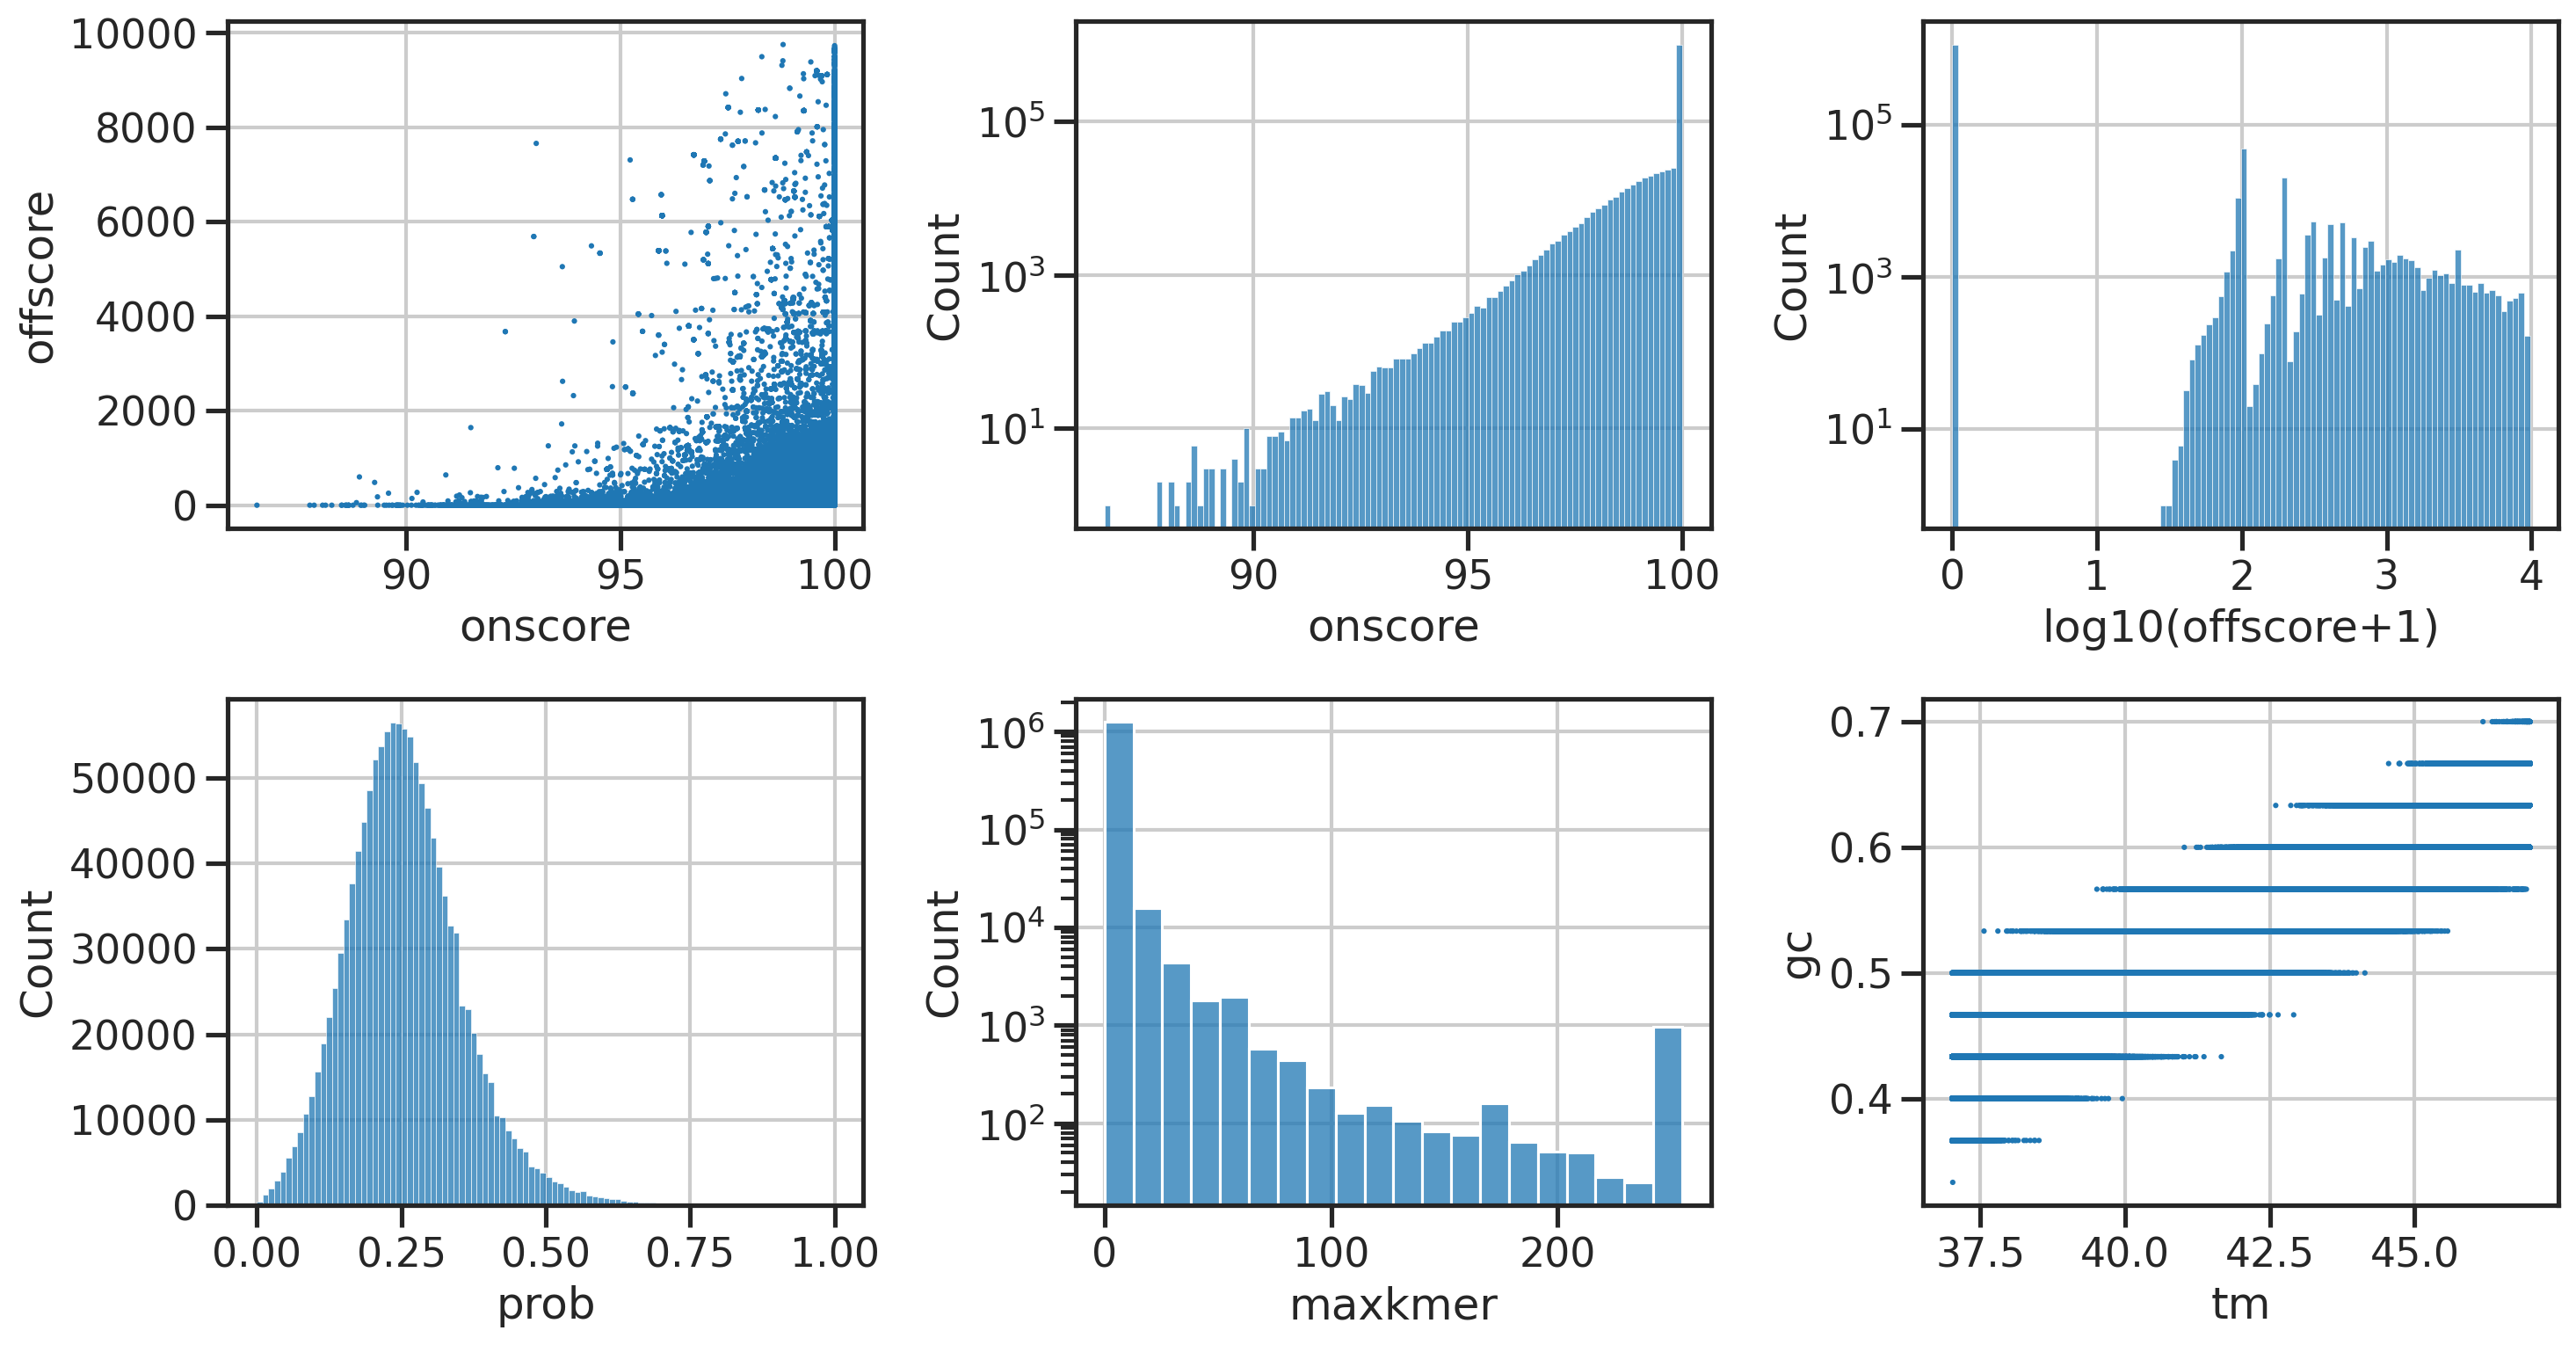

In [6]:
diagnostic_panels(dfnew)

In [7]:
dfnew2 = dfnew.copy()
cond = dfnew2['offscore']<50
dfnew2 = dfnew2[cond]
print(dfnew2.shape)

cond = dfnew2['onscore']>97
dfnew2 = dfnew2[cond]
print(dfnew2.shape)

cond = dfnew2['maxkmer']<=10
dfnew2 = dfnew2[cond]
print(dfnew2.shape)

cond = dfnew2['prob']<=0.5
dfnew2 = dfnew2[cond]
print(dfnew2.shape)

(1142602, 15)
(1126913, 15)
(1119200, 15)
(1098721, 15)


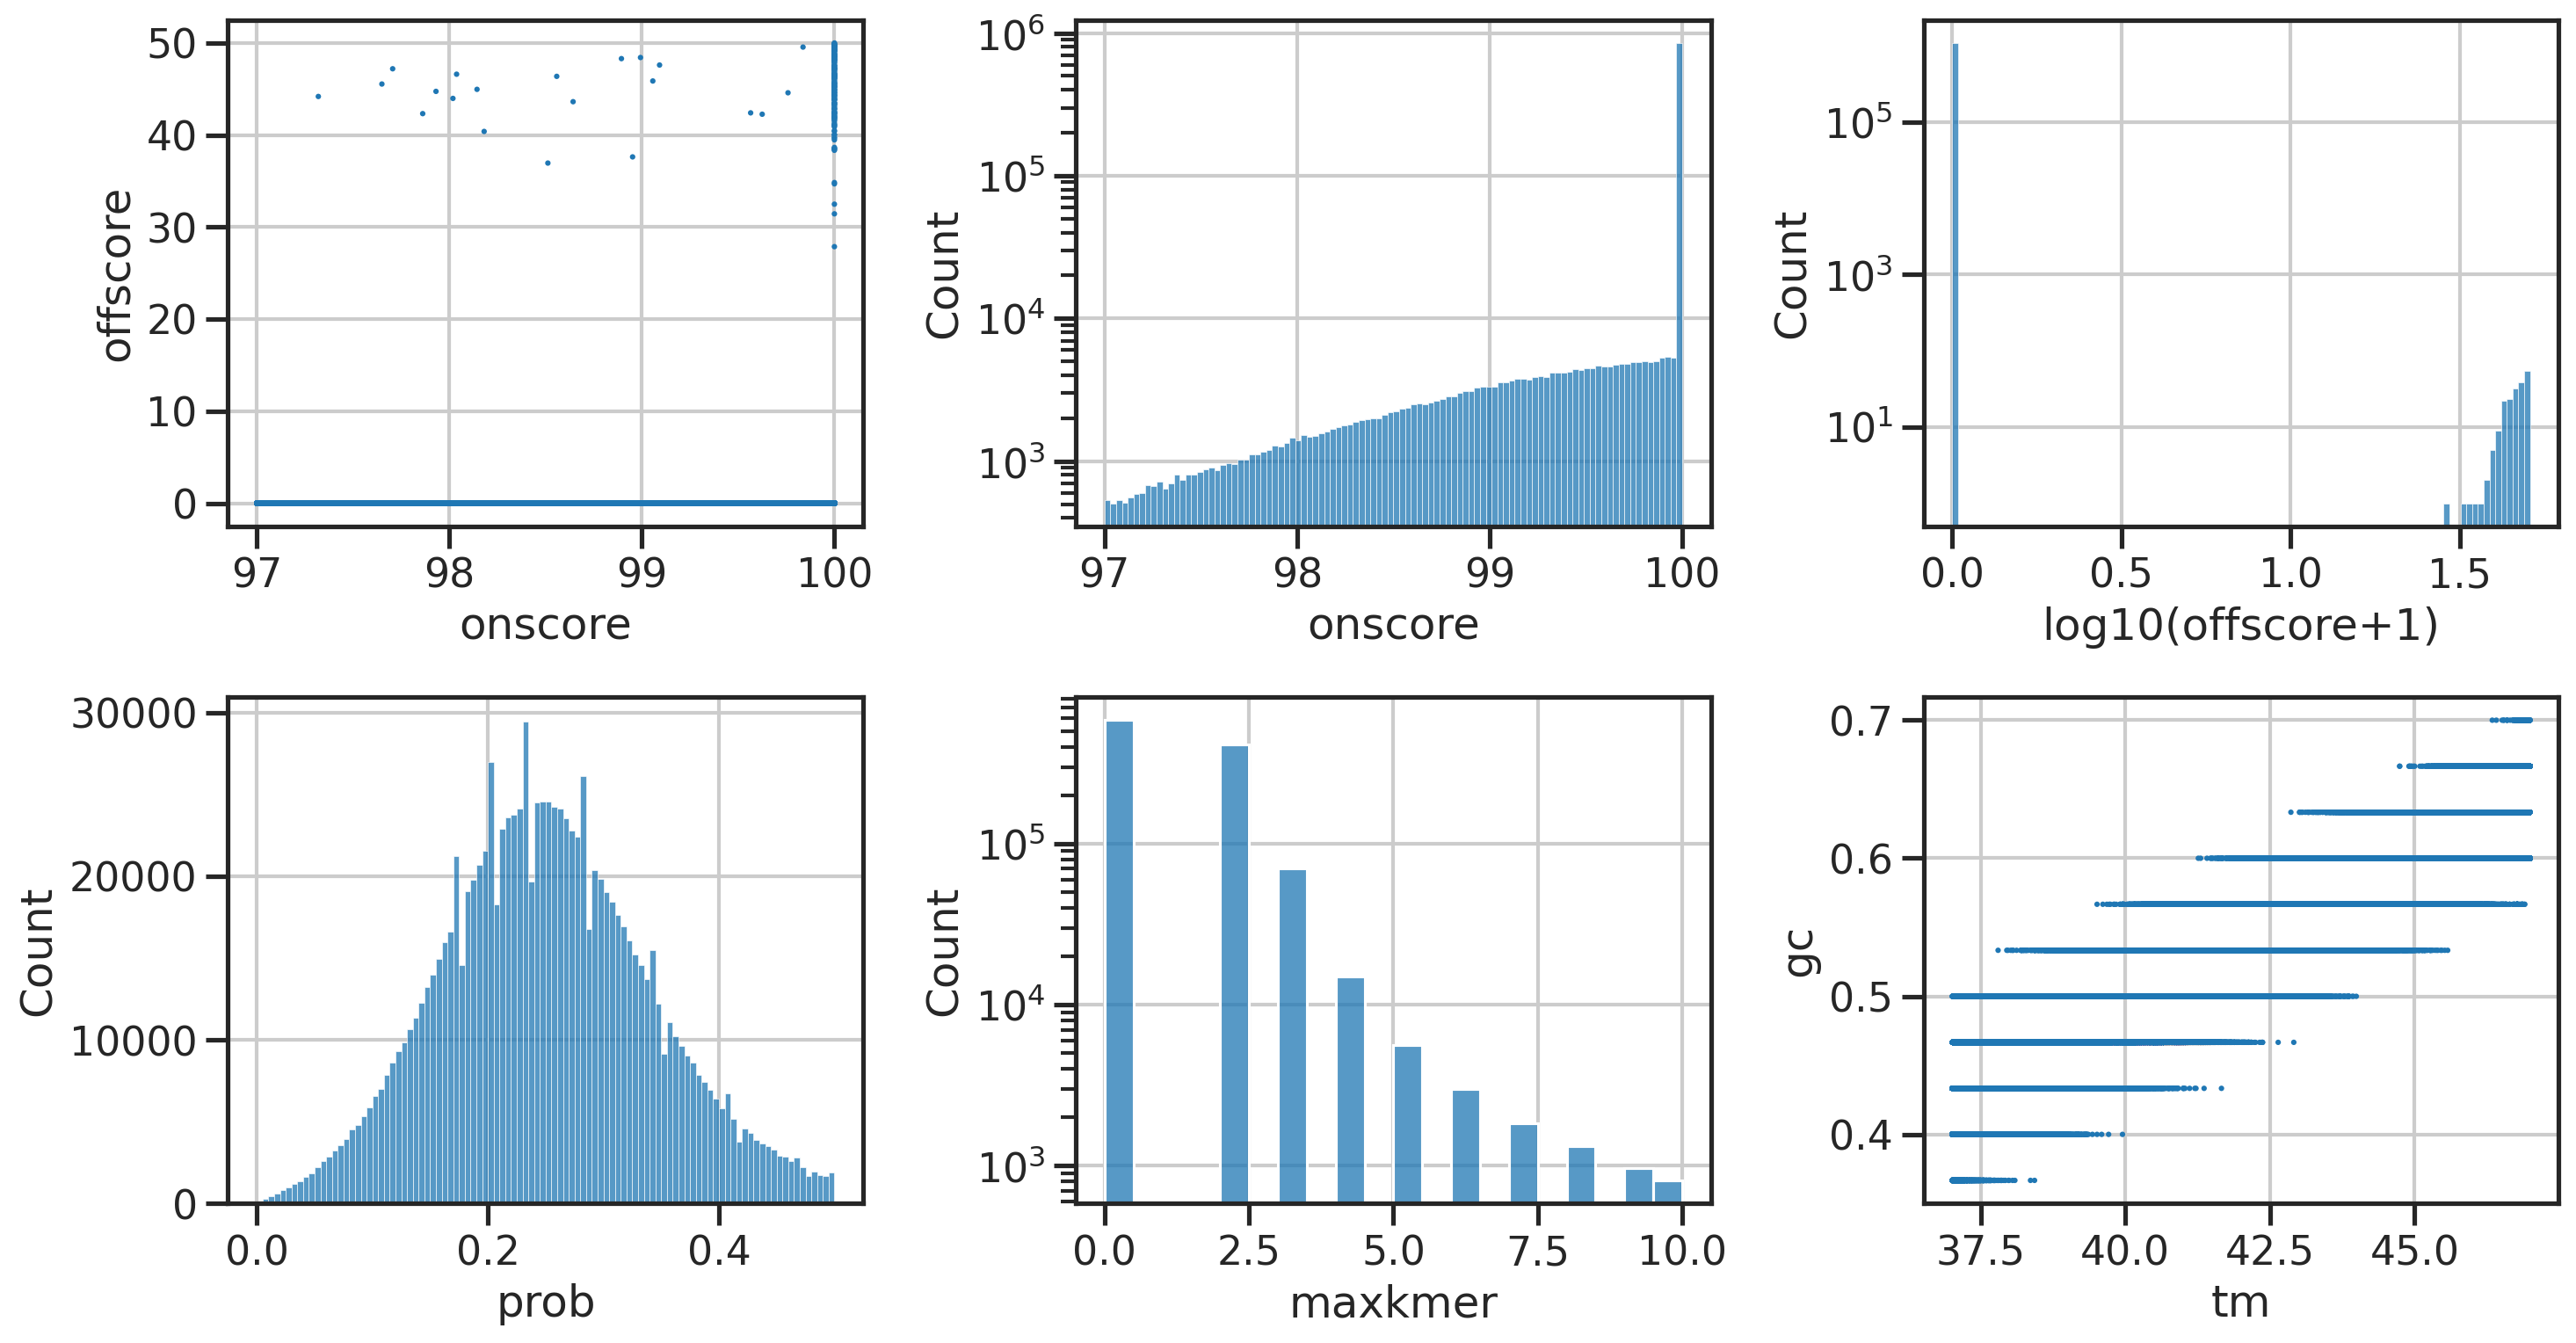

In [8]:
diagnostic_panels(dfnew2)

In [9]:
gene_cnstrnts = df.groupby('gname').size()
gene_cnstrnts_new = dfnew2.groupby('gname').size()# .reindex(gene_constraints.index)
cnstrnts = pd.DataFrame(gene_cnstrnts)
cnstrnts = cnstrnts.join(pd.DataFrame(gene_cnstrnts_new).rename(columns={0:1}))
cnstrnts = cnstrnts.fillna(0).astype(int)
cnstrnts

,0,1
gname,,
0610005C13Rik,24,20
0610009B22Rik,12,9
0610009E02Rik,9,9
0610009L18Rik,11,11
0610010F05Rik,33,32
...,...,...
Zyx,39,34
Zzef1,272,262
Zzz3,118,74


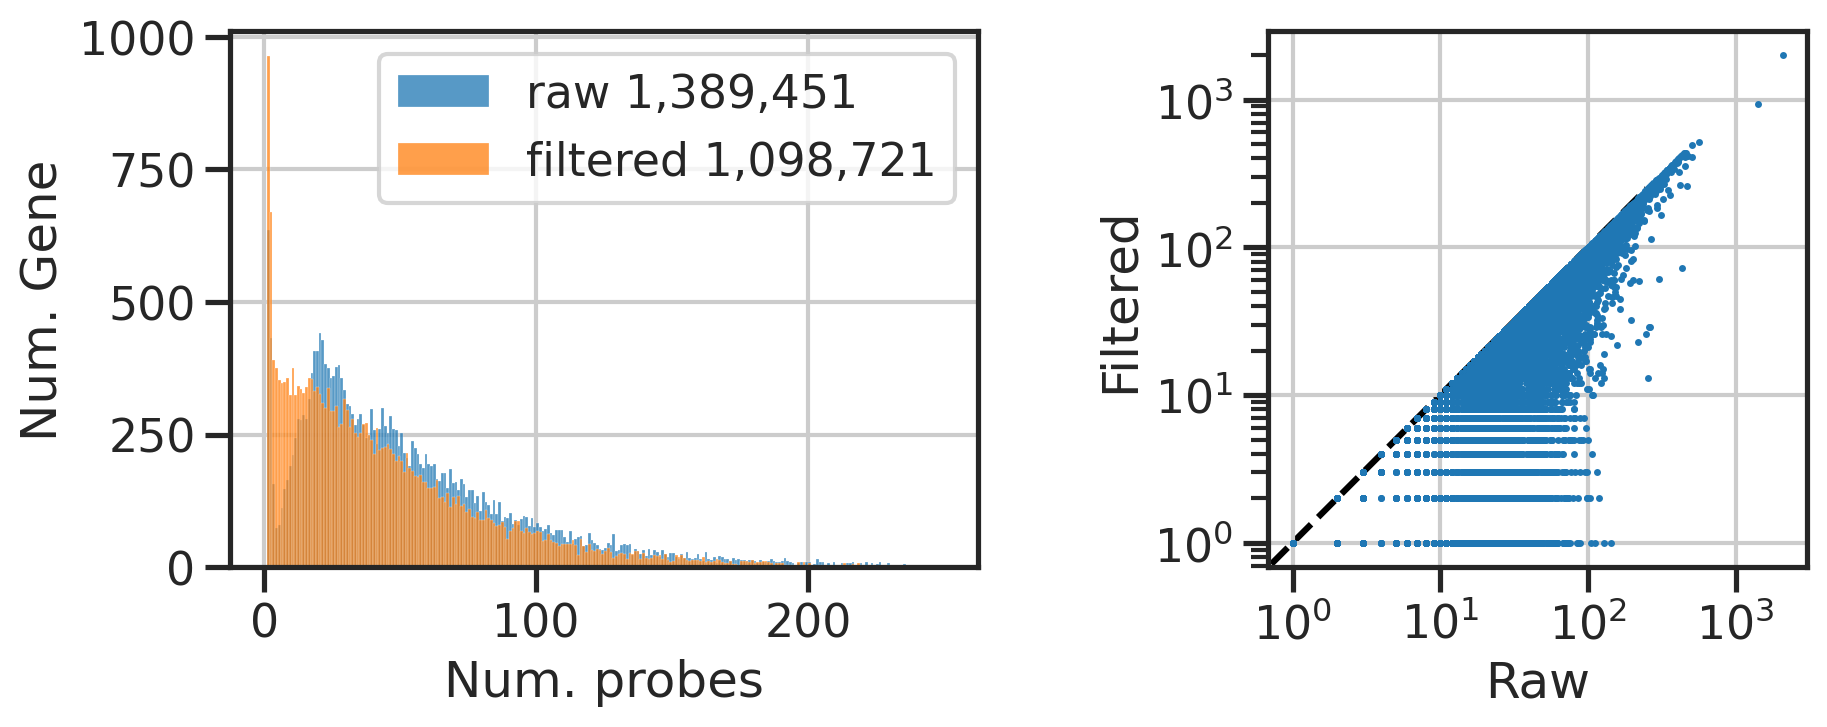

In [10]:
fig, axs = plt.subplots(1,2,figsize=(2*5,1*4))
ax = axs[0]
sns.histplot(np.sort(gene_cnstrnts),     color='C0', bins=np.linspace(0,250,251), ax=ax, label=f'raw {gene_cnstrnts.sum():,}')
sns.histplot(np.sort(gene_cnstrnts_new), color='C1', bins=np.linspace(0,250,251), ax=ax, label=f'filtered {gene_cnstrnts_new.sum():,}')
ax.set_ylabel('Num. Gene')
ax.set_xlabel('Num. probes')
ax.legend()

ax = axs[1]
ax.scatter(cnstrnts[0], cnstrnts[1], s=1)
ax.plot([0,250], [0,250], '--k', zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Raw')
ax.set_ylabel('Filtered')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([1,10,100,1000])
ax.set_yticks([1,10,100,1000])
fig.tight_layout()
plt.show()

In [11]:
cnstrnts.sort_values(0, ascending=False)

,0,1
gname,,
Ttn,2086,2007
Kcnq1ot1,1407,931
Grin2b,569,514
Syne2,507,491
Neb,503,409
...,...,...
Mir487b,1,0
Mir7021,1,1
Mir483,1,0


Gene Ttn
Transcript (Including UTRs)
   Position: mm10 chr2:76,703,980-76,982,455 Size: 278,476 Total Exon Count: 347 Strand: -
Coding Region
   Position: mm10 chr2:76,705,031-76,980,182 Size: 275,152 Coding Exon Count: 346 

# recalculate Tm

In [12]:
dfviz = df.iloc[:10000].copy()
dfviz['dfttm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=50, Na=390, dnac1=25, dnac2=25))
dfviz['ourtm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=30, Na=300, dnac1=2,  dnac2=0.001))
dfviz['mattm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=0,  Na=300, dnac1=2,  dnac2=2)) 
dfviz

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc,dfttm,ourtm,mattm
0,chr1,3214511,3214540,AAAAGCACCATGACCAAGGACACCGAAAAC,40.12,100.0,0.0,0,0.456,25,+,Xkr4,1,30,0.466667,40.118889,49.902234,68.722494
1,chr1,3214541,3214570,AGAAAGCGGGAATGTTTACTTGCTGTGTGG,39.76,100.0,0.0,0,0.310,0,+,Xkr4,1,30,0.466667,39.761150,49.552458,68.374389
2,chr1,3214625,3214654,ACAAATCTTAGCTGATGGAGTGGTAAGCCC,38.59,100.0,0.0,0,0.276,0,+,Xkr4,1,30,0.466667,38.591548,48.337885,67.150450
3,chr1,3214679,3214708,AATGGCATACACATTGCATCTGTATGCTCT,37.39,100.0,0.0,0,0.177,3,+,Xkr4,1,30,0.400000,37.389299,47.152698,65.968853
4,chr1,3214721,3214750,TGTGTCCCAAAGTCTCTAGTAGACACATCA,37.01,100.0,0.0,0,0.234,2,+,Xkr4,1,30,0.433333,37.007756,46.753305,65.565742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr1,37906715,37906744,TCATTGCCATAGTAACATCAAAAGGGCTGA,37.11,100.0,0.0,0,0.348,0,+,Lyg2,1,30,0.400000,37.105588,46.850688,65.663029
9996,chr1,37906745,37906774,TGCTGGTGAAACTAATGCTTCCAGGGGAAA,40.41,100.0,0.0,0,0.231,0,+,Lyg2,1,30,0.466667,40.413954,50.118893,68.922770
9997,chr1,37906775,37906804,ATCCAAAAGAAATTACCCCTGAGCAGCATG,37.94,100.0,0.0,0,0.194,2,+,Lyg2,1,30,0.433333,37.943595,47.697962,66.512218
9998,chr1,37906805,37906834,GCCAACTGAAGAACGTCTCAGTCTGCACAC,41.19,100.0,0.0,0,0.213,2,+,Lyg2,1,30,0.533333,41.186139,51.027522,69.859887


Text(0, 0.5, 'our setting TM')

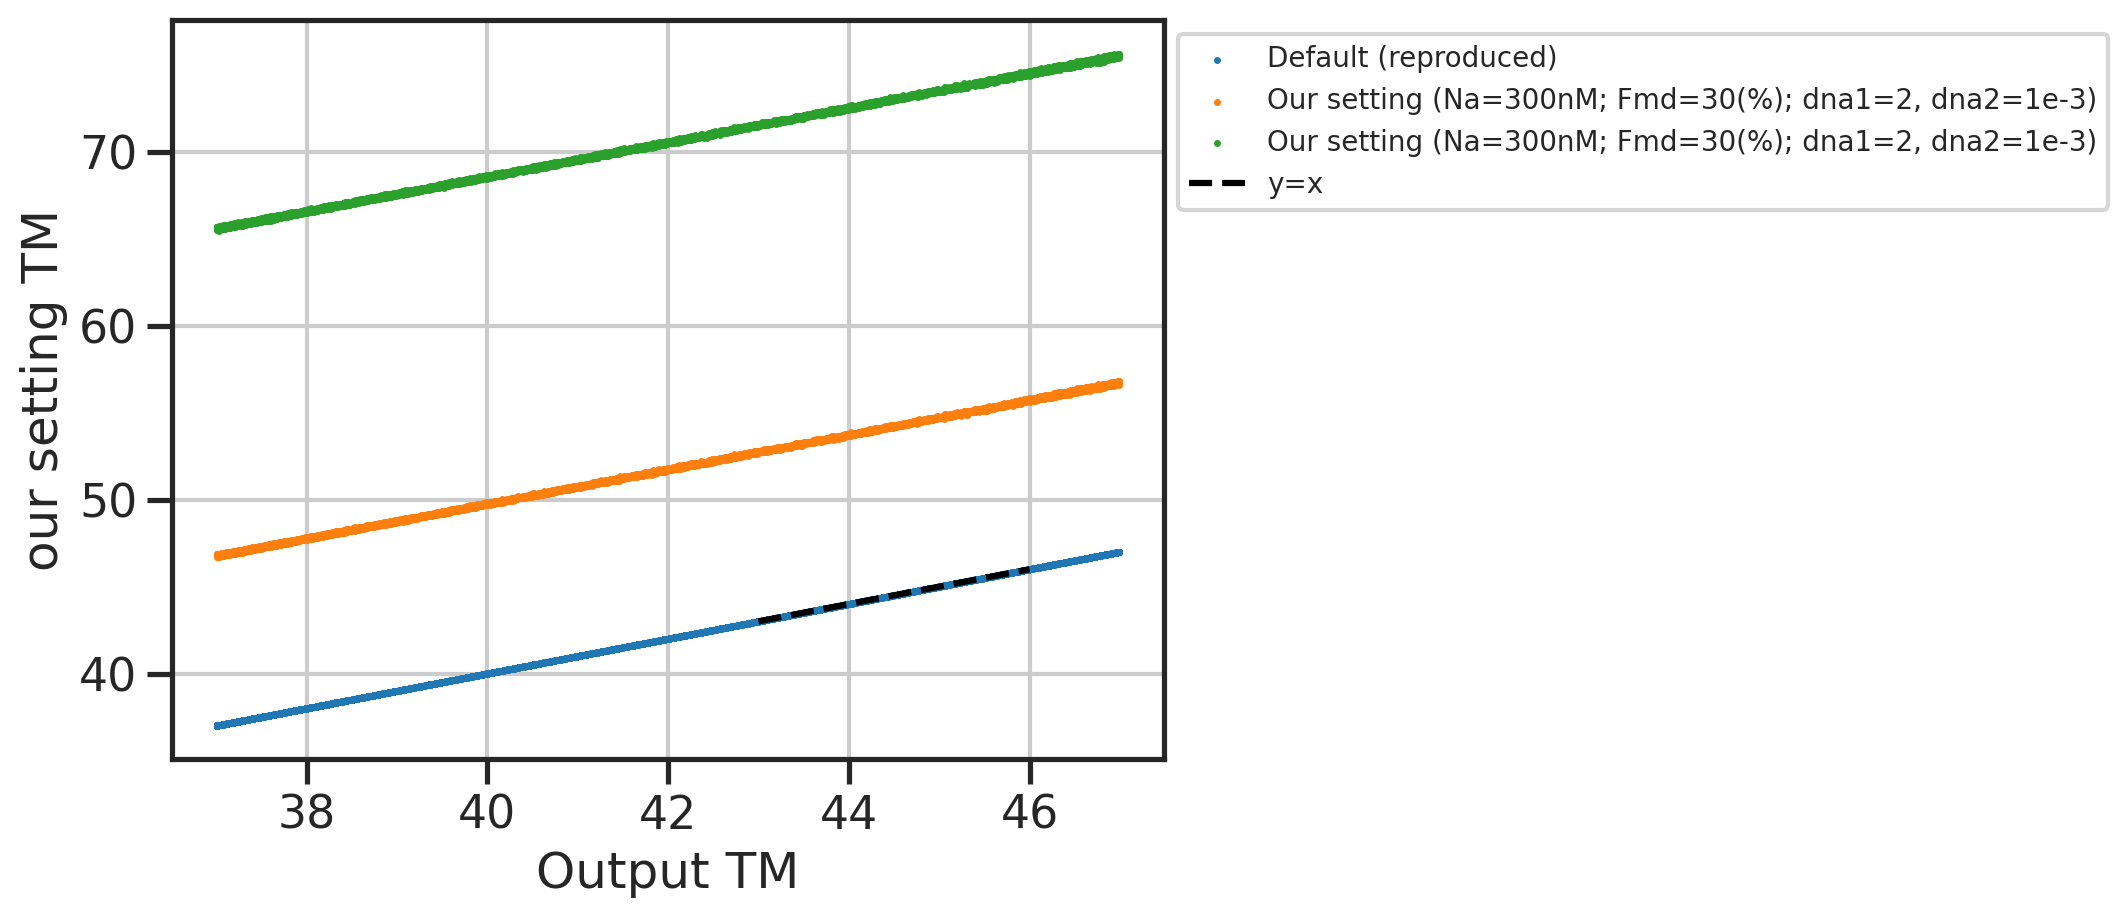

In [13]:
plt.scatter(dfviz['tm'].values, 
            dfviz['dfttm'].values,
            s=1,
            label="Default (reproduced)",
            ) 
plt.scatter(dfviz['tm'].values, 
            dfviz['ourtm'].values,
            s=1,
            label="Our setting (Na=300nM; Fmd=30(%); dna1=2, dna2=1e-3)",
            ) 
plt.scatter(dfviz['tm'].values, 
            dfviz['mattm'].values,
            s=1,
            label="Our setting (Na=300nM; Fmd=30(%); dna1=2, dna2=1e-3)",
            ) 
plt.plot([43,46], [43,46], '--k', label='y=x')
# plt.xticks([37, 40, 45, 50, 52])
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.xlabel("Output TM")
plt.ylabel("our setting TM")

Text(0, 0.5, 'Diff')

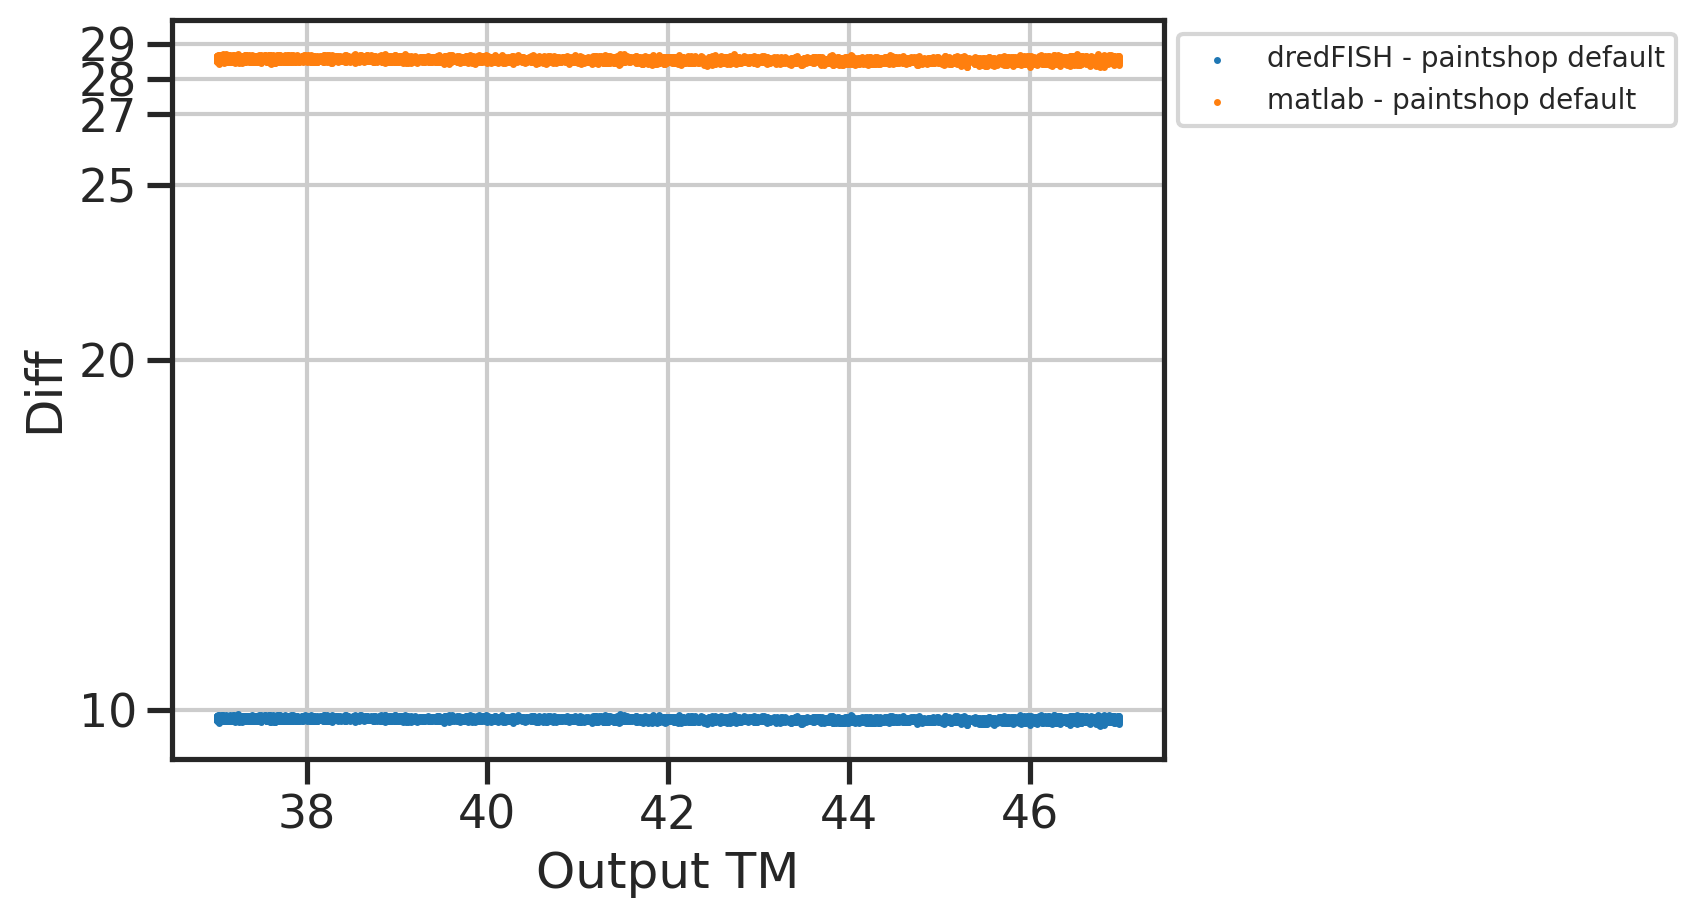

In [14]:
plt.scatter(dfviz['tm'].values, 
            dfviz['ourtm'].values - dfviz['dfttm'].values,
            s=1,
            label="dredFISH - paintshop default",
            ) 
plt.scatter(dfviz['tm'].values, 
            dfviz['mattm'].values - dfviz['dfttm'].values,
            s=1,
            label="matlab - paintshop default",
            ) 
plt.yticks([10,20,25,27,28,29])
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.xlabel("Output TM")
plt.ylabel("Diff")

# get gene annotation -- how much exonic regions were used by the probes?

In [15]:
f = "/bigstore/GeneralStorage/fangming/projects/dredfish/packages/PaintSHOP_pipeline/test2/data/num30mer_estimate.csv"
upp = pd.read_csv(f, index_col=0)
upp

,len,num30mer,num30mer_cont
gene,,,
0610005C13Rik,1122,34,37
0610009B22Rik,795,25,26
0610009E02Rik,1974,63,65
0610009L18Rik,619,20,20
0610010F05Rik,5020,156,167
...,...,...,...
Zyx,4504,144,150
Zzef1,11150,346,371
Zzz3,7909,255,263


In [16]:
resall = upp.join(cnstrnts).fillna(0).astype(int)
resall

,len,num30mer,num30mer_cont,0,1
gene,,,,,
0610005C13Rik,1122,34,37,24,20
0610009B22Rik,795,25,26,12,9
0610009E02Rik,1974,63,65,9,9
0610009L18Rik,619,20,20,11,11
0610010F05Rik,5020,156,167,33,32
...,...,...,...,...,...
Zyx,4504,144,150,39,34
Zzef1,11150,346,371,272,262
Zzz3,7909,255,263,118,74


/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


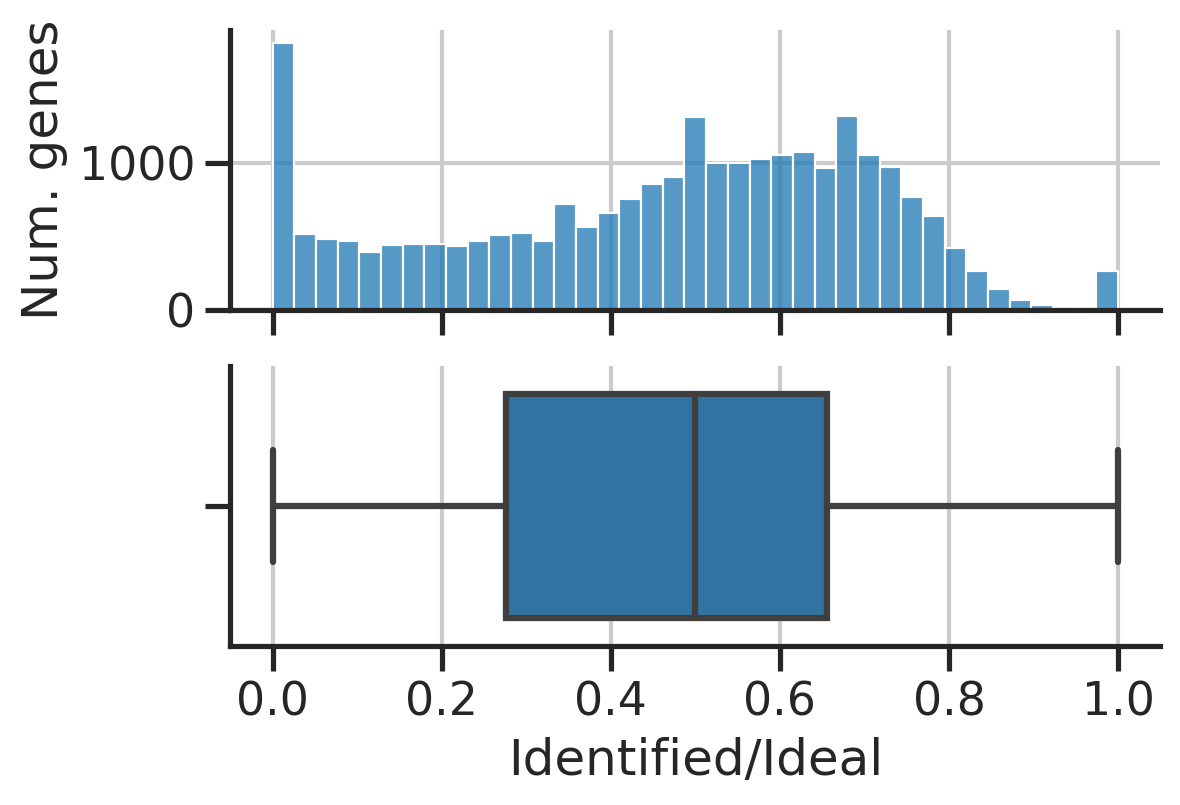

In [17]:
fig, axs = plt.subplots(2,1,figsize=(1*6,2*2), sharex=True)
ax = axs[0]
sns.histplot(resall[1]/resall['num30mer'], ax=ax)
ax.set_ylabel('Num. genes')
sns.despine(ax=ax)
ax = axs[1]
sns.boxplot(resall[1]/resall['num30mer'],  ax=ax)
ax.set_xlabel('Identified/Ideal')
sns.despine(ax=ax)

In [18]:
def panels2(_x, _y, xlabel='ctrl', ylabel='case'):
    """
    """
    fig = plt.figure(figsize=(12,6))
    axd = fig.subplot_mosaic("""AB
                                AC""")

    ax = axd['A']
    ax.scatter(_x, _y, s=1)
    ax.plot([1,100], [1,100], '--k', zorder=0)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax = axd['B']
    sns.histplot(_y/_x, ax=ax)
    ax.set_ylabel('Num. genes')
    sns.despine(ax=ax)

    ax = axd['C']
    sns.boxplot(_y/_x,  ax=ax)
    ax.set_xlabel(f'{ylabel}/{xlabel}')
    sns.despine(ax=ax)

    fig.tight_layout()
    plt.show()

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


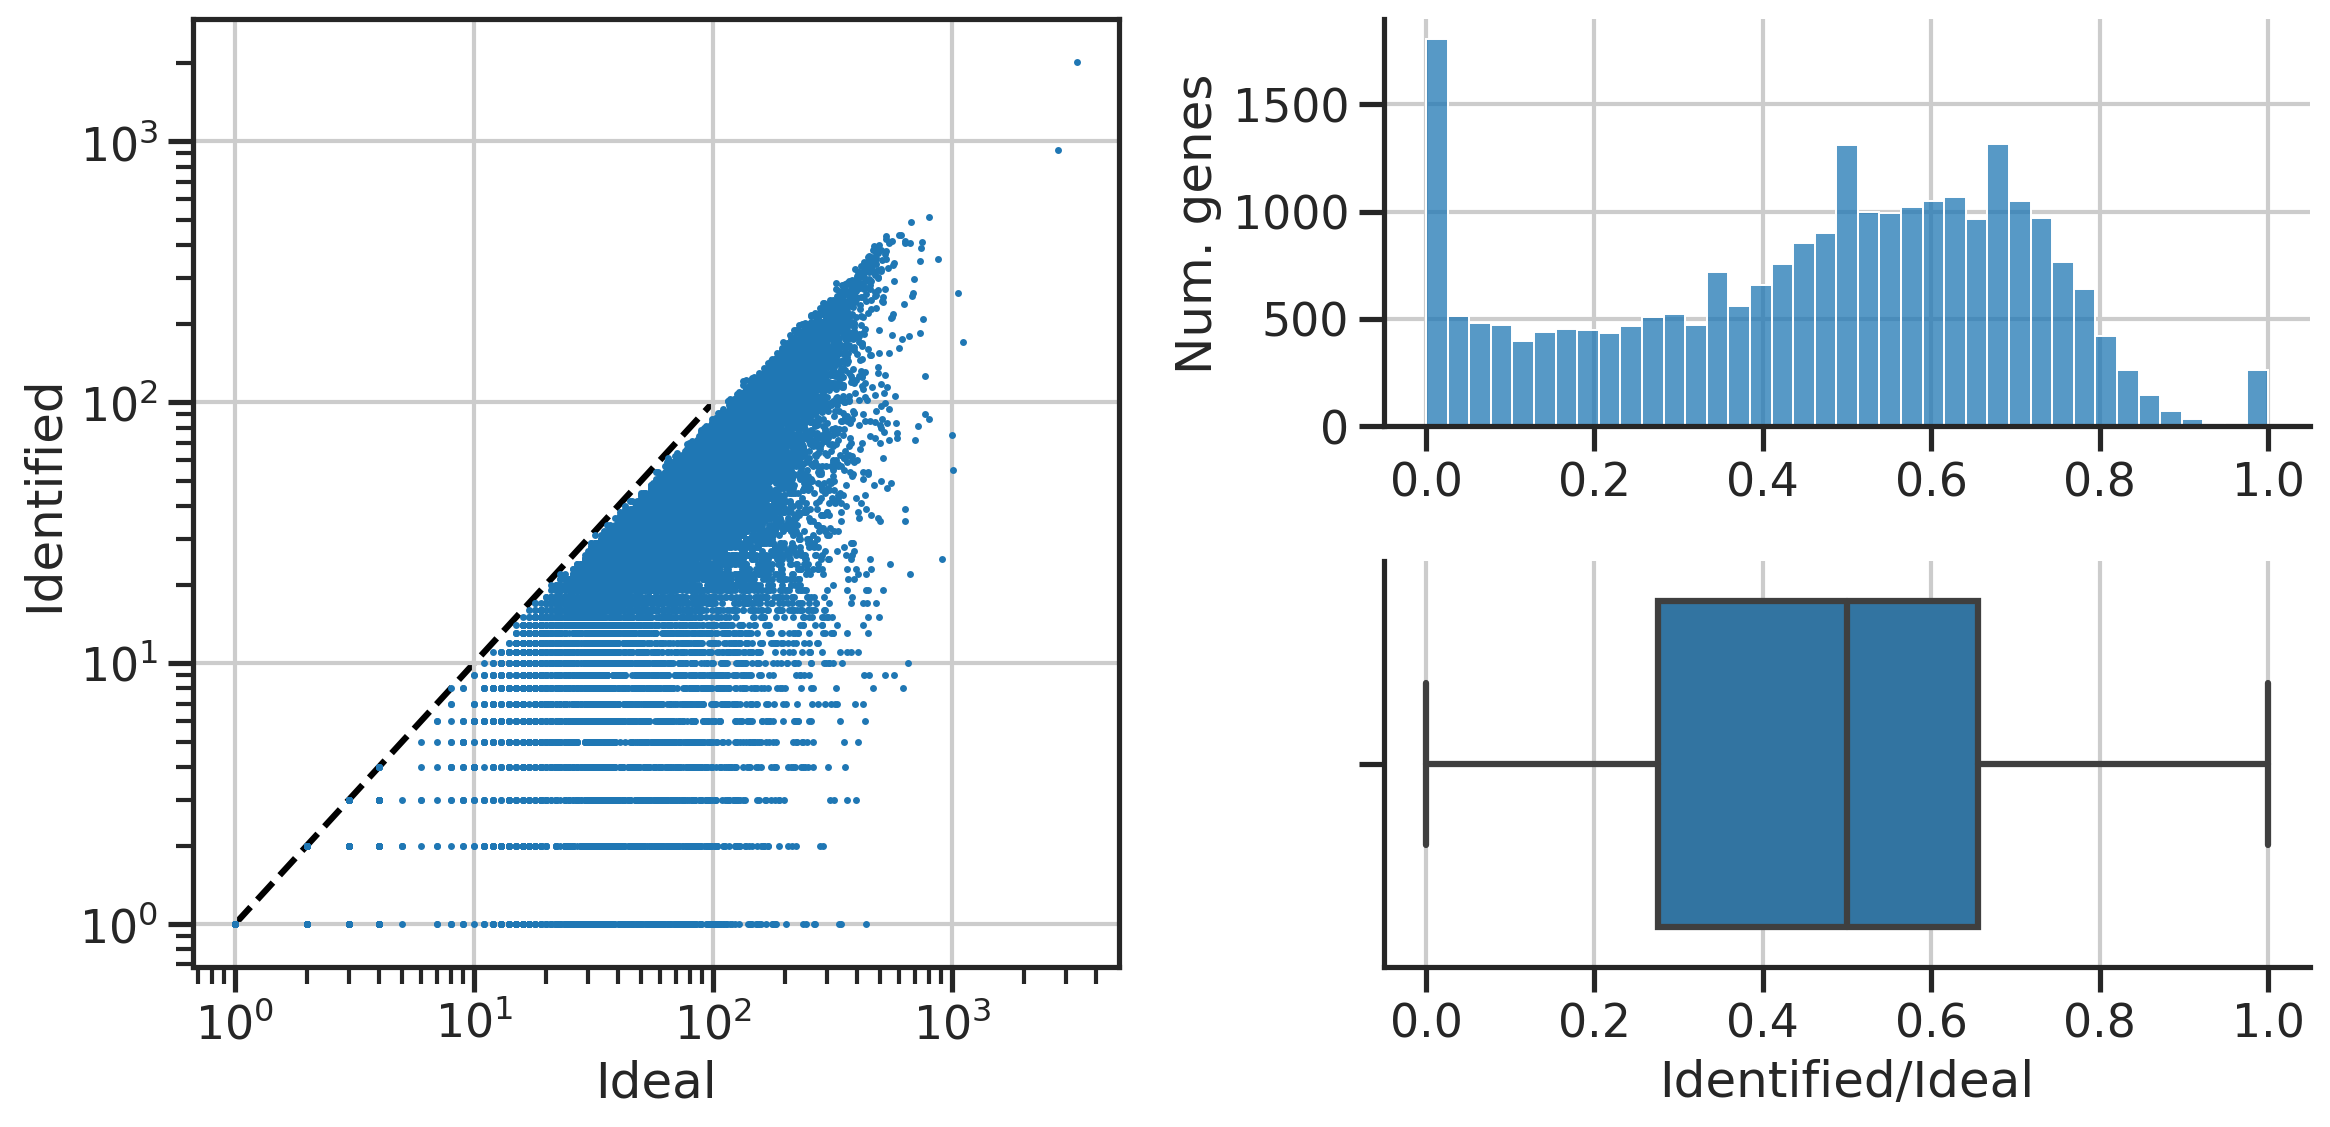

In [19]:
_x = resall['num30mer']
_y = resall[1]
panels2(_x, _y, xlabel='Ideal', ylabel='Identified')

# get PaintSHOP default; get old

In [20]:
# f = "/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Design/paintshop/data/mm10_isoflat_counts.csv"
f = "/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Design/paintshop/data/mm10_isoflat_counts_filtered_Oct26.csv"
dft = pd.read_csv(f, header=None, index_col=0)[1]
dft

0
0610005C13Rik     22
0610009B22Rik      8
0610009E02Rik      9
0610009L18Rik     10
0610010F05Rik     21
                ... 
Zyx               33
Zzef1            214
Zzz3              55
a                 10
ccdc198           19
Name: 1, Length: 23378, dtype: int64

In [21]:
resall = (upp.join(cnstrnts).join(dft.to_frame('default'))).fillna(0).astype(int)
resall

,len,num30mer,num30mer_cont,0,1,default
gene,,,,,,
0610005C13Rik,1122,34,37,24,20,22
0610009B22Rik,795,25,26,12,9,8
0610009E02Rik,1974,63,65,9,9,9
0610009L18Rik,619,20,20,11,11,10
0610010F05Rik,5020,156,167,33,32,21
...,...,...,...,...,...,...
Zyx,4504,144,150,39,34,33
Zzef1,11150,346,371,272,262,214
Zzz3,7909,255,263,118,74,55


/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


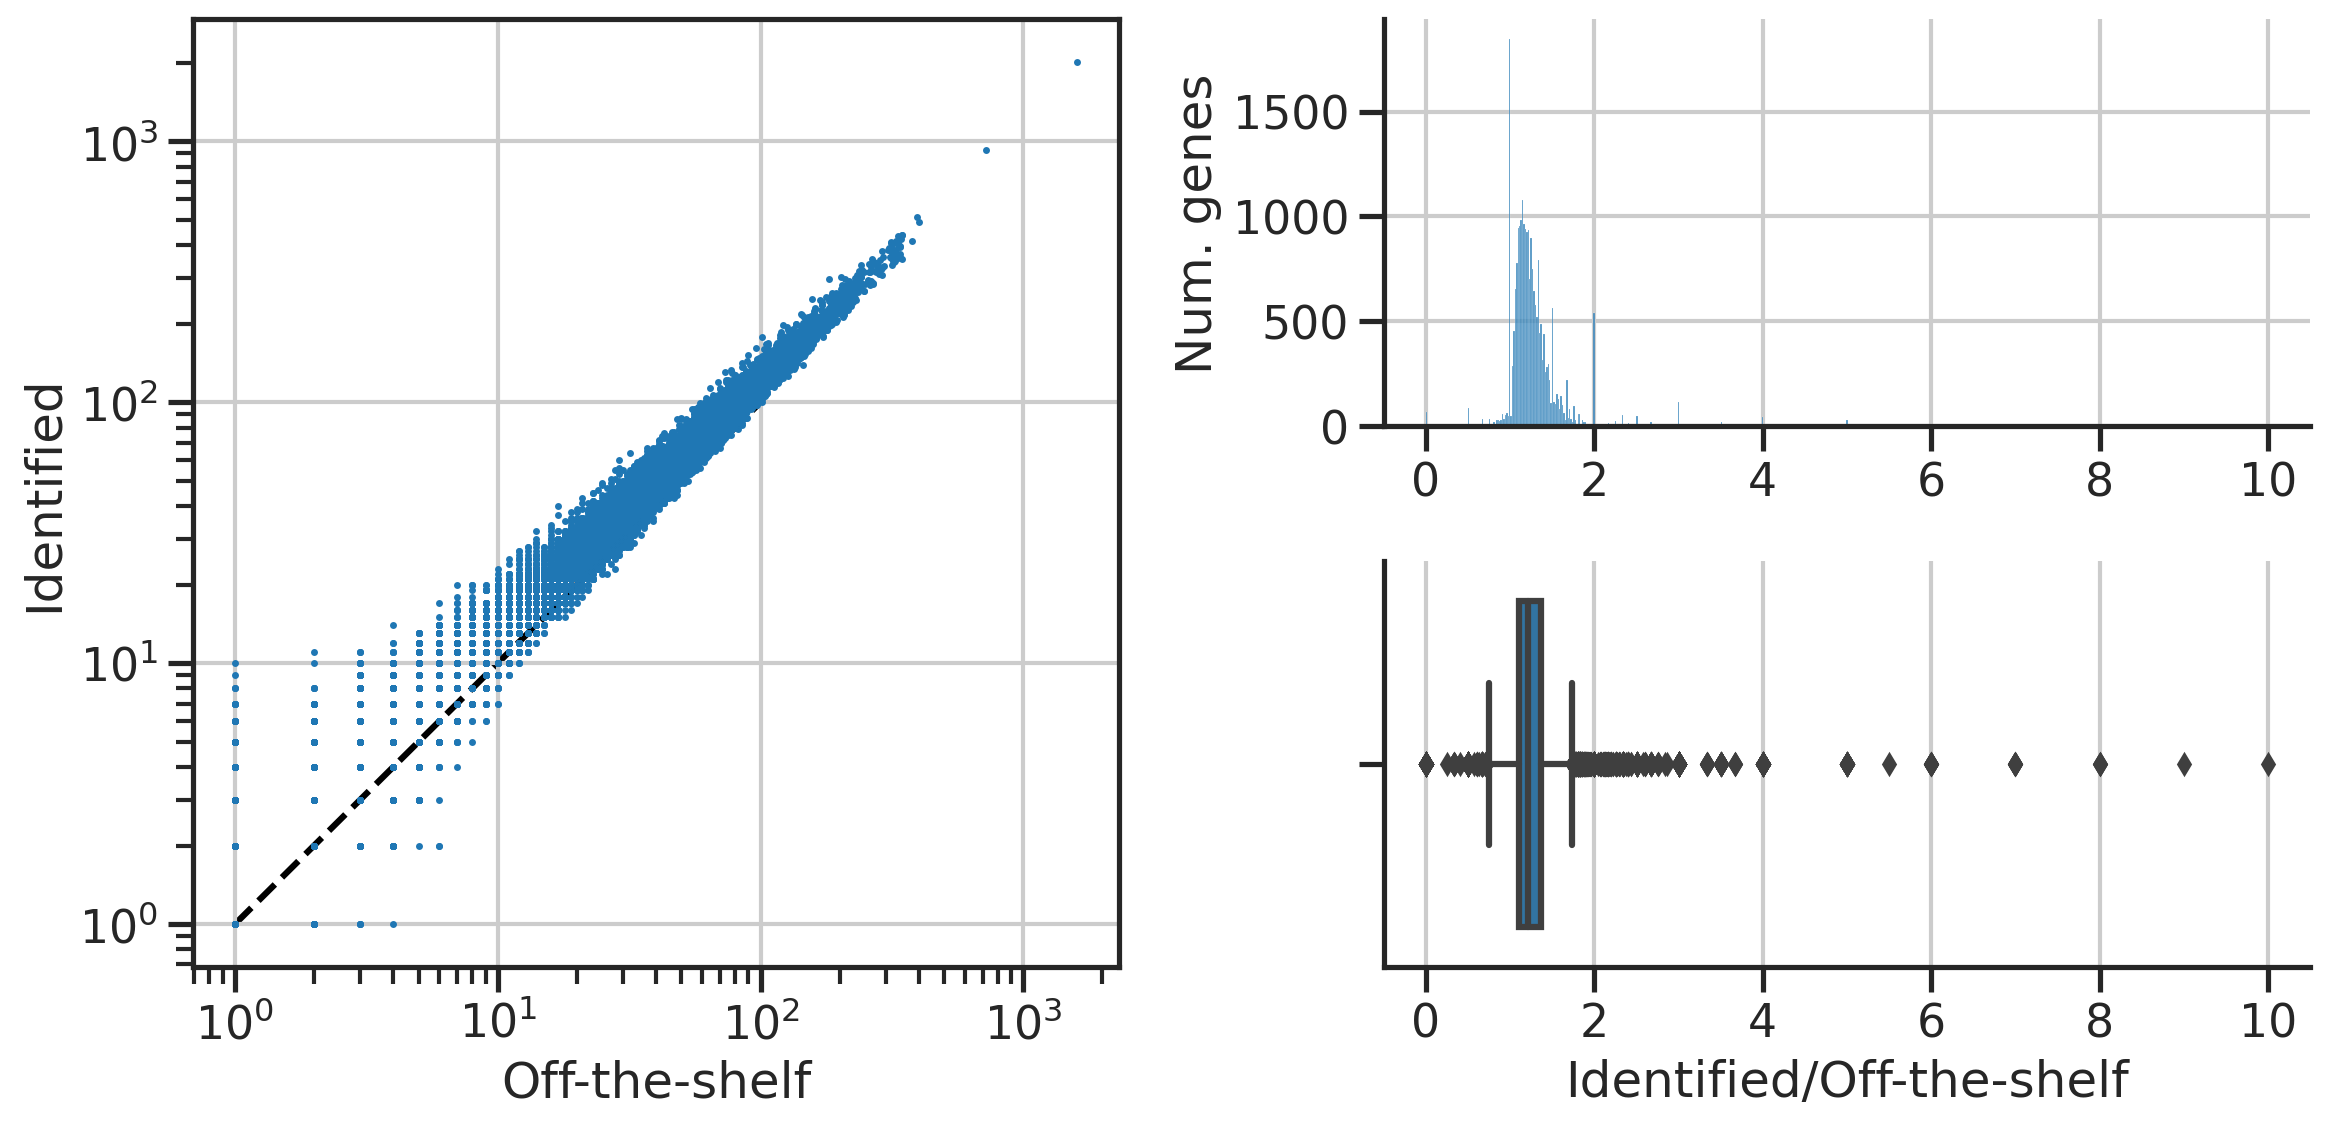

In [22]:
_x = resall['default']
_y = resall[1]
panels2(_x, _y, xlabel='Off-the-shelf', ylabel='Identified')

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


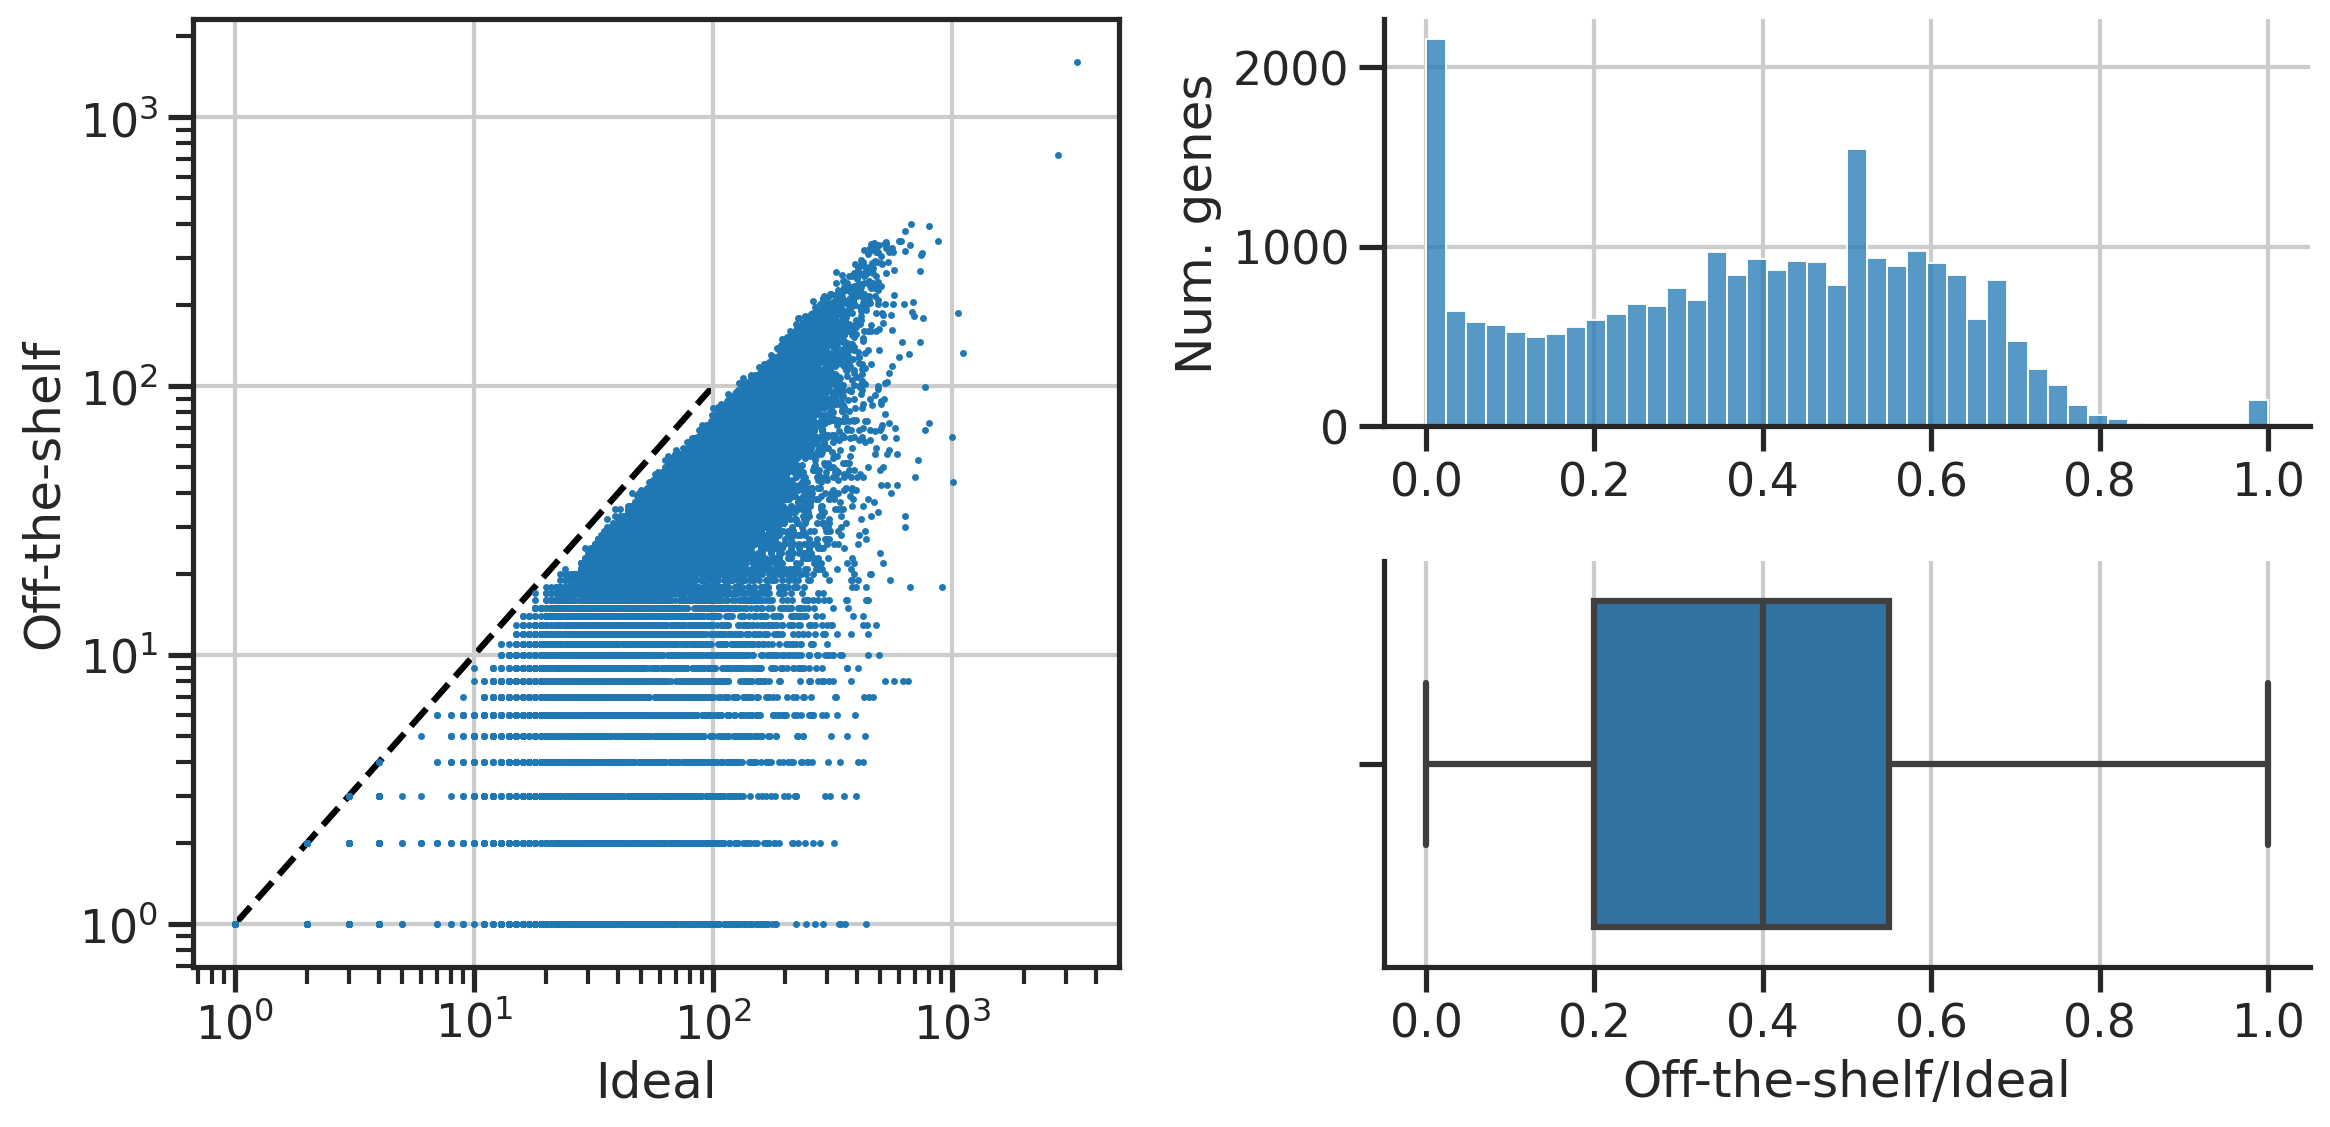

In [23]:
_x = resall['num30mer']
_y = resall['default']
panels2(_x, _y, xlabel='Ideal', ylabel='Off-the-shelf')

# save results of this code:
- filtered sequences 
- counts per gene (can be easily generated)

In [24]:
dfnew2

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
1,chr1,3214541,3214570,AGAAAGCGGGAATGTTTACTTGCTGTGTGG,39.76,100.0,0.0,0,0.310,0,+,Xkr4,1,30,0.466667
2,chr1,3214625,3214654,ACAAATCTTAGCTGATGGAGTGGTAAGCCC,38.59,100.0,0.0,0,0.276,0,+,Xkr4,1,30,0.466667
3,chr1,3214679,3214708,AATGGCATACACATTGCATCTGTATGCTCT,37.39,100.0,0.0,0,0.177,3,+,Xkr4,1,30,0.400000
4,chr1,3214721,3214750,TGTGTCCCAAAGTCTCTAGTAGACACATCA,37.01,100.0,0.0,0,0.234,2,+,Xkr4,1,30,0.433333
5,chr1,3214751,3214780,TTTTGACCTTGGATGGGAAGAGGGTAAGTC,38.33,100.0,0.0,0,0.381,2,+,Xkr4,1,30,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387763,chrY,2663507,2663536,TTTTCGGCTTCTGTAAGGCTTTTCCACCTG,39.57,100.0,0.0,0,0.302,2,+,Sry,1,30,0.466667
1387764,chrY,2663537,2663566,CATCCCAGCTGCTTGCTGATCTCTGTATTT,39.00,100.0,0.0,0,0.198,10,+,Sry,1,30,0.466667
1387765,chrY,2663567,2663596,TGCATGCTGGGATTCTGCTGGGCCAACTTG,44.74,100.0,0.0,0,0.339,0,+,Sry,1,30,0.566667
1387766,chrY,2663597,2663626,TGCCTCTCACCACGGGACCACACCATAAAT,43.00,100.0,0.0,0,0.333,0,+,Sry,1,30,0.533333


In [25]:
output = '../paintshop/data/paintshop_pipe/mm10_tm37-47_tp37_30bp_Oct28.csv'
# dfnew2.to_csv(output, header=True, index=False)

In [26]:
# !chmod 444 $output
# !head $output

In [28]:
output = '../paintshop/data/paintshop_pipe/mm10_tm37-47_tp37_30bp_countspergene_Oct28.csv'
# dfnew2.groupby('gname').size().to_frame('counts').to_csv(output)

In [ ]:
# !chmod 444 $output
# !head $output